# Задание
Среди клиентов туристической фирмы 30% ездили в Турцию, 20% — в
Египет, 10% — в Грецию; в Турцию и Египет — 12%, в Египет и Грецию
— 5%, в Турцию и Грецию — 6%, во все три страны — 4%. Найти
вероятность того, что случайно выбранный клиент: а) ездил в Турцию или
Египет, б) ездил в Египет или Грецию, в) ездил в Турцию. Египет или
Грецию, г) не ездил ни в одну из перечисленных стран
# Решение

Для решения задачи методом "дерево вероятностей" в Jupyter Notebook необходимо:

1. Построить дерево вероятностей:

    Рассмотрим клиентов, которые посещали некоторые страны Европы (Турцию, Египет или Грецию), посещавших их по отдельности, либо все вместе, либо непосещавших никакие из них.
    Конкретно в данной задаче нас интересуют группы: клиенты, ездившие в Турцию или Египет, езившие в Египет или Грецию, ездившие в одну из 3 стран, неездившие никуда.
    Для каждой группы у нас есть вероятность того, что случайный клиент попадает в эту группу (успех) или непопадает в группу (неудача).

2. Найти полную вероятность того, что случайный клиент попадет в каждую из этих групп, используя формулу полной вероятности.

3. Построить дерево вероятностей с помощью графических инструментов библиотеки matplotlib.

Стоит заметить, что полная вероятность (1) складывается из 2 основных исходов: случайный клиент ездил в какую то из 3 стран или не ездил никуда. Вероятность того, что клиент ездил хоть куда то - складывается из суммы вероятностей исходов: клиент ездил только в Турцию, клиент ездил только в Грецию, клиент ездил только в Египет, клиент ездил в Турцию и Египет (но не был в Греции), клиент ездил в Египет и Грецию (но не был в Турции), клиент ездил в Турцию и Грецию (но не был в Египте) и клиент был в 3 странах сразу 

Вероятность того, что клиент ездил в Турцию или Египет будет складываться из суммы вероятностей: клиент ездил только в Турцию, клиент ездил только в Египет, клиент ездил в Турцию и Египет (но не был в Греции), клиент ездил в Египет и Грецию (но не был в Турции), клиент ездил в Турцию и Грецию (но не был в Египте) и клиент был в 3 странах сразу 

Вероятность того, что клиент ездил в Египет или Грецию будет складываться из суммы вероятностей: клиент ездил только в Грецию, клиент ездил только в Египет, клиент ездил в Турцию и Египет (но не был в Греции), клиент ездил в Египет и Грецию (но не был в Турции), клиент ездил в Турцию и Грецию (но не был в Египте) и клиент был в 3 странах сразу 

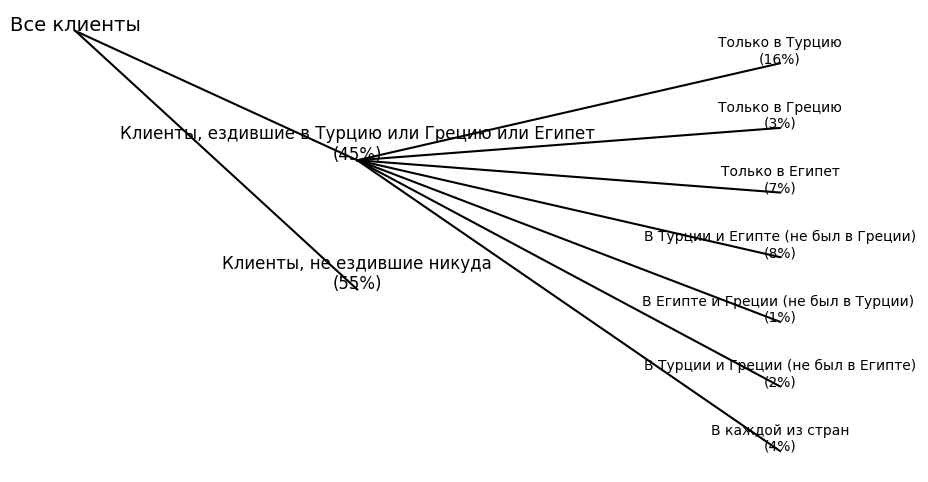

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Вероятности
P_T = 0.3    # Вероятность того, что клиент ездил в Турцию
P_E = 0.2    # Вероятность того, что клиент ездил в Египет
P_G = 0.1    # Вероятность того, что клиент ездил в Грецию
P_TandE = 0.12  # Вероятность того, что клиент ездил в Турцию и Египет
P_EandG = 0.05  # Вероятность того, что клиент ездил в Египет и Грецию
P_TandG = 0.06  # Вероятность того, что клиент ездил в Турцию и Грецию
P_TandEandG = 0.04 # Вероятность того, что клиент ездил в Турцию, Египет и Грецию

# Вероятность того, что клиент ездил в Турцию или Египет = 0.38
P_TorE = P_T + P_E - P_TandE

# Вероятность того, что клиент ездил в Египет или Грецию = 0.25
P_EorG = P_E + P_G - P_EandG

# Вероятность того, что клиент ездил в Турцию или Грецию (но не был в Египте) = 0.02
P_TorGnotE = P_TandG - P_TandEandG

# Вероятность того, что клиент ездил в Турцию или Египте (но не был в Греции) = 0.08
P_TorEnotG = P_TandE - P_TandEandG

# Вероятность того, что клиент ездил в Египет или Грецию (но не был в Турции) = 0.01
P_EorGnotT = P_EandG - P_TandEandG

# Вероятность того, что клиент ездил в Турцию, Египет или Грецию = 0.6 - 0.02 - 0.08 - 0.01 - 0.04 = 0.45
P_TorEorG = P_T + P_G + P_E - P_TorGnotE - P_TorEnotG - P_EorGnotT - P_TandEandG

# Вероятность того, что ни в одной стране не был = 1 - 0.45 = 0.55
P_other = 1 - P_TorEorG

# Вероятность того, что клиент ездил только в Турцию = 0.3 - 0.02 - 0.08 - 0.04 = 0.16
P_onlyT = P_T - P_TorGnotE - P_TorEnotG - P_TandEandG

# Вероятность того, что клиент ездил только в Египет = 0.2 - 0.08 - 0.01 - 0.04 = 0.07
P_onlyE = P_E - P_TorEnotG - P_EorGnotT - P_TandEandG

# Вероятность того, что клиент ездил только в Грецию = 0.1 - 0.02 - 0.01 - 0.04 = 0.03
P_onlyG = P_G - P_TorGnotE - P_EorGnotT - P_TandEandG

# Построение дерева вероятностей
fig, ax = plt.subplots(figsize=(10, 6))

# Дерево вероятностей
# Первый уровень
ax.text(0.1, 0.9, 'Все клиенты', fontsize=14, ha='center')

# Второй уровень
ax.text(0.3, 0.7, 'Клиенты, ездившие в Турцию или Грецию или Египет\n(45%)', fontsize=12, ha='center')
ax.text(0.3, 0.5, 'Клиенты, не ездившие никуда\n(55%)', fontsize=12, ha='center')

# Третий уровень для тех, кто ездил в какую то страну
ax.text(0.6, 0.85, 'Только в Турцию\n(16%)', fontsize=10, ha='center')
ax.text(0.6, 0.75, 'Только в Грецию\n(3%)', fontsize=10, ha='center')
ax.text(0.6, 0.65, 'Только в Египет\n(7%)', fontsize=10, ha='center')
ax.text(0.6, 0.55, 'В Турции и Египте (не был в Греции)\n(8%)', fontsize=10, ha='center')
ax.text(0.6, 0.45, 'В Египте и Греции (не был в Турции) \n(1%)', fontsize=10, ha='center')
ax.text(0.6, 0.35, 'В Турции и Греции (не был в Египте)\n(2%)', fontsize=10, ha='center')
ax.text(0.6, 0.25, 'В каждой из стран\n(4%)', fontsize=10, ha='center')

# Соединительные линии
ax.plot([0.1, 0.3], [0.9, 0.7], 'k-')
ax.plot([0.1, 0.3], [0.9, 0.5], 'k-')

ax.plot([0.3, 0.6], [0.7, 0.85], 'k-')
ax.plot([0.3, 0.6], [0.7, 0.75], 'k-')
ax.plot([0.3, 0.6], [0.7, 0.65], 'k-')
ax.plot([0.3, 0.6], [0.7, 0.55], 'k-')
ax.plot([0.3, 0.6], [0.7, 0.45], 'k-')
ax.plot([0.3, 0.6], [0.7, 0.35], 'k-')
ax.plot([0.3, 0.6], [0.7, 0.25], 'k-')

ax.axis('off')
plt.show()